Looking at HSC at sky senor data for fringing

In [1]:
%pylab inline
import scipy.stats
from astropy.io import fits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import rc,rcParams
rc('font', weight='bold')

def get_lh (data,clip_percent = 1):
    lo, hi = np.percentile(
        data.ravel(), (0.5 * clip_percent, 100 - 0.5 * clip_percent))
    return(lo,hi)

Populating the interactive namespace from numpy and matplotlib


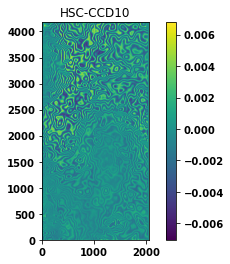

In [2]:
hdu = fits.open('data/HSC-Y/FRINGE-2017-09-13-HSC-Y-001.fits')
data = hdu[1].data
plt.title('HSC-CCD10')
lo,hi = get_lh(data)
plt.imshow(data,origin= 'lower',vmin=lo,vmax = hi)
plt.colorbar()

(-0.4, 0.4)

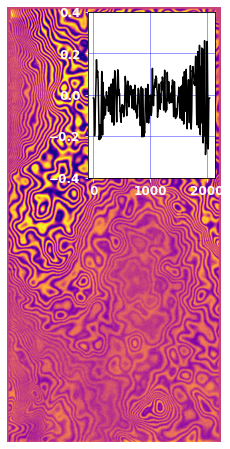

In [3]:
from scipy.ndimage import gaussian_filter,gaussian_laplace
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
f,ax = plt.subplots(1,1,figsize = (8,8))
A = gaussian_filter(data, sigma= 3)
lo,hi = get_lh(A)
ax.imshow(A,origin = 'lower',vmin = lo, vmax = hi,cmap='plasma')
inner_ax = inset_axes(ax,
                        width="60%", # width = 30% of parent_bbox
                        height=2.3, # height : 1 inch
                        loc=1)
inner_ax.grid(c='b', ls='-', alpha=0.5)
inner_ax.plot(np.diag(A)*100,'k-')
inner_ax.tick_params(axis='x', colors='w', labelsize=12)
inner_ax.tick_params(axis='y', colors='w', labelsize=12)
ax.axis('off')
inner_ax.set_ylim(-0.4,0.4)
#plt.title('HSC-CCD10 zoom-in')
#plt.colorbar()

Text(0.5, 0, 'Diagonal pixel')

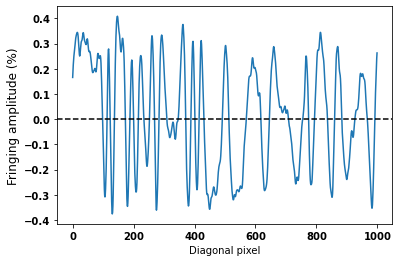

In [4]:
plt.plot(np.diag(A[3000:-176,1000:-48])*100)
plt.axhline(0,ls = '--',color = 'black')
plt.ylabel('Fringing amplitude (%)',fontsize = 12)  
plt.xlabel('Diagonal pixel')

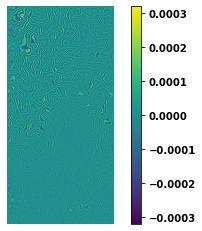

In [5]:
B = gaussian_laplace(data, sigma=2)

lo,hi = get_lh(B)
plt.imshow(B,origin = 'lower',vmin = lo, vmax = hi)
plt.axis('off')
plt.colorbar()

Text(0.5, 0, 'diagonal pixel')

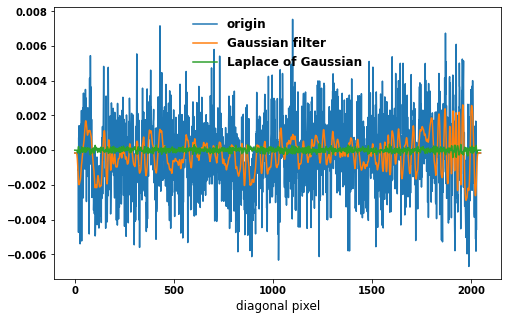

In [6]:
plt.figure(figsize = (8,5))
plt.plot(np.diag(data),'-',label = 'origin')
plt.plot(np.diag(A),label = 'Gaussian filter')
plt.plot(np.diag(B), label = 'Laplace of Gaussian')

plt.legend(frameon = False,fontsize = 12)
plt.xlabel('diagonal pixel',fontsize = 12)